## Give an example of batch processing a set of images and labels

This notebook shows how to apply processing to a set of images and labels.  The images and labels are each put into separate directories but have the same file names.  For example a directory 'inputs' may contain 'image1.tif, image2.tif, image3.tif...' and a directory labels may also contain 'image1.tif, image2.tif, image2.tif...'.  The former will have the input images and the latter the ground truth labels.  This is a format commonly used to store deep learning training sets, however it can also be used to store image/label sets for other uses

In [1]:
import os
import numpy as np

tnia_dir = r"D:\images\tnia-python-images"
batch_dir = os.path.join(tnia_dir, r"deep learning\training")

input_dir = os.path.join(batch_dir, r"input")
truth_dir = os.path.join(batch_dir, r"truth")

print(batch_dir)


D:\images\tnia-python-images\deep learning\training


## Process the image label set

In this example we loop through the input (images) and truth (labels) directories load both, create a histogram of the image, and display all three.

phantomsub0.tif


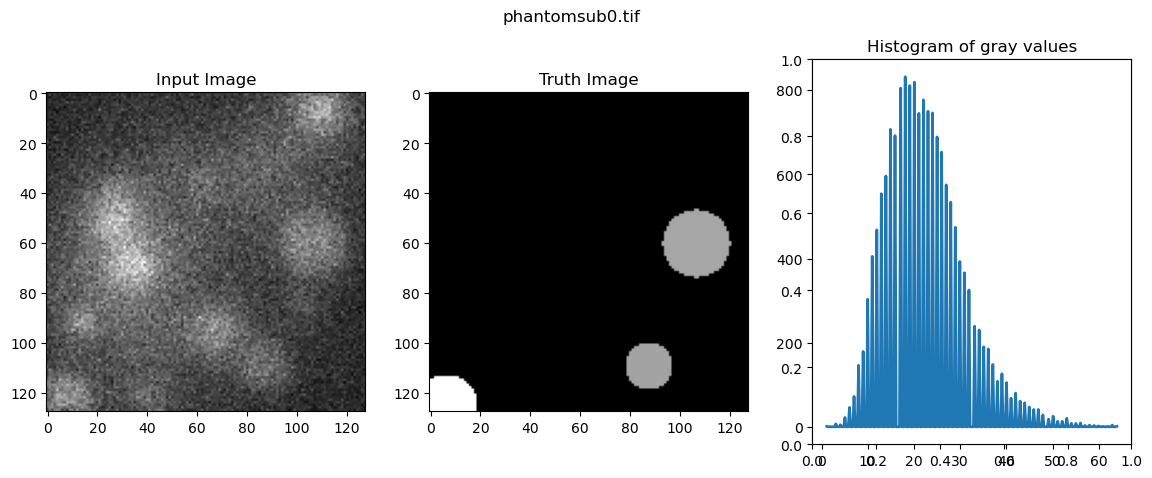

phantomsub1.tif


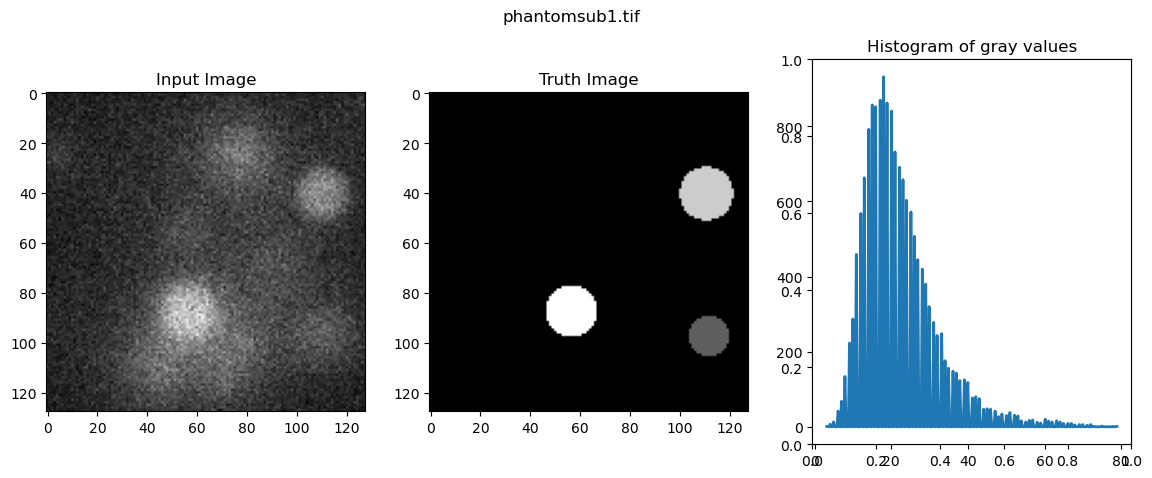

phantomsub2.tif


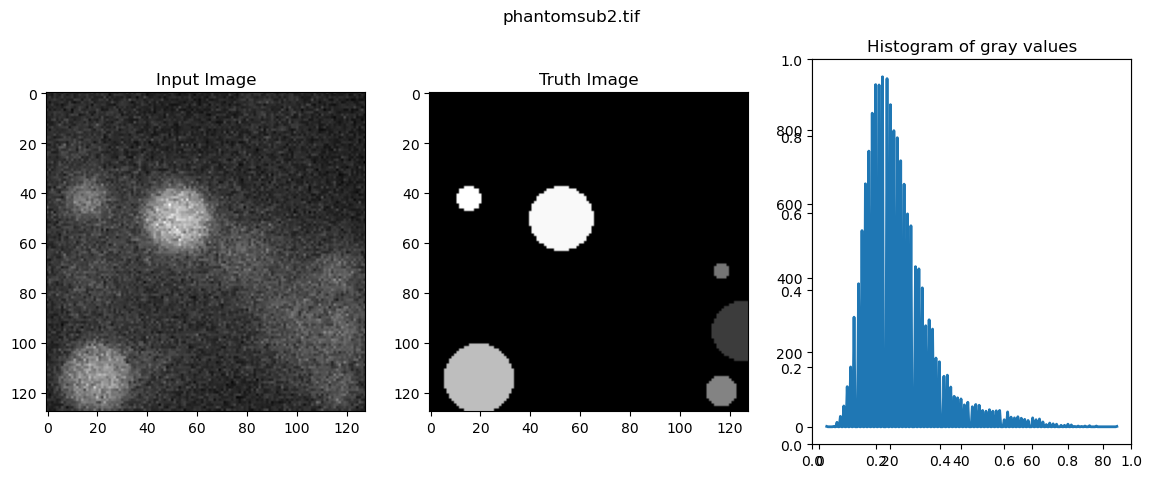

phantomsub3.tif


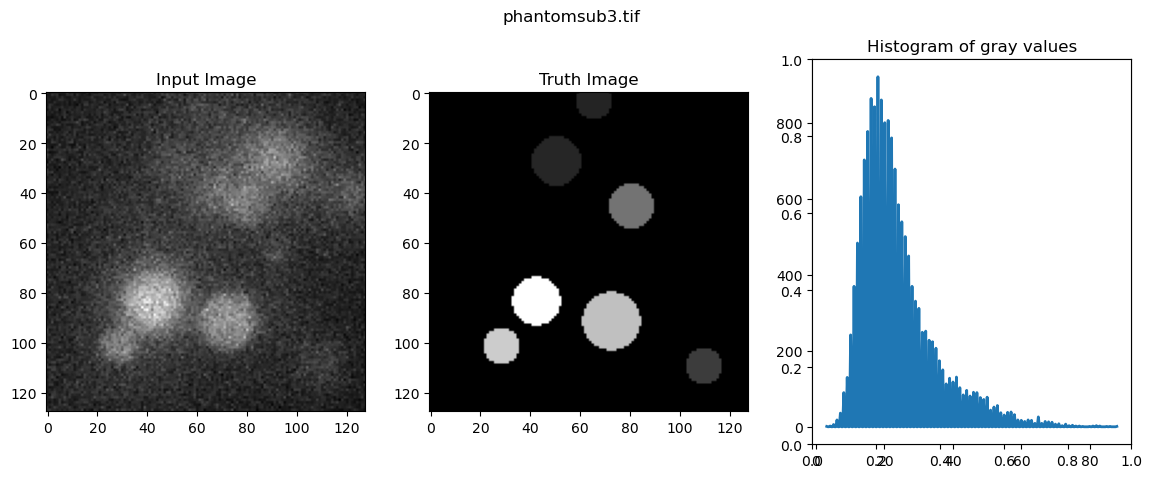

phantomsub4.tif


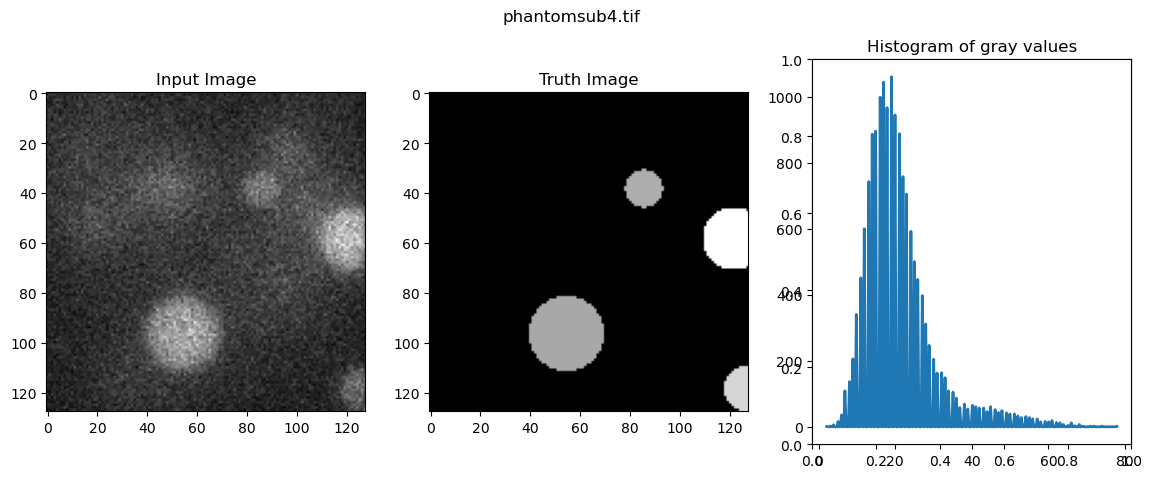

phantomsub5.tif


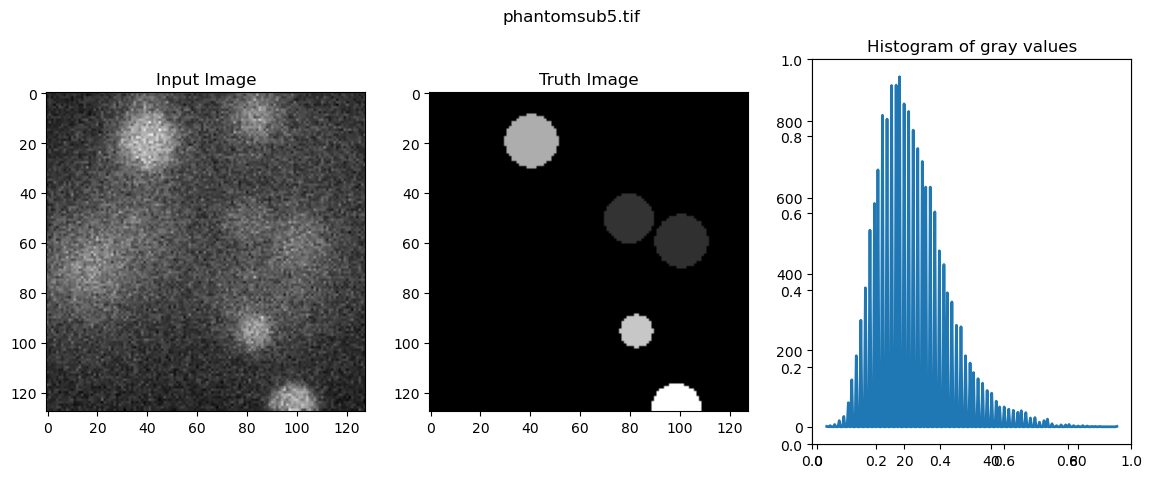

phantomsub6.tif


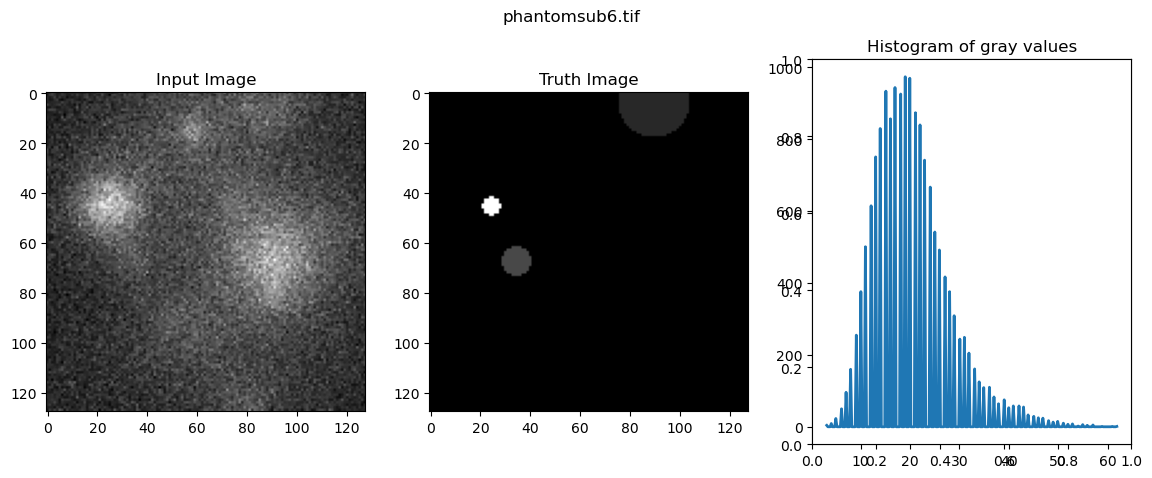

phantomsub7.tif


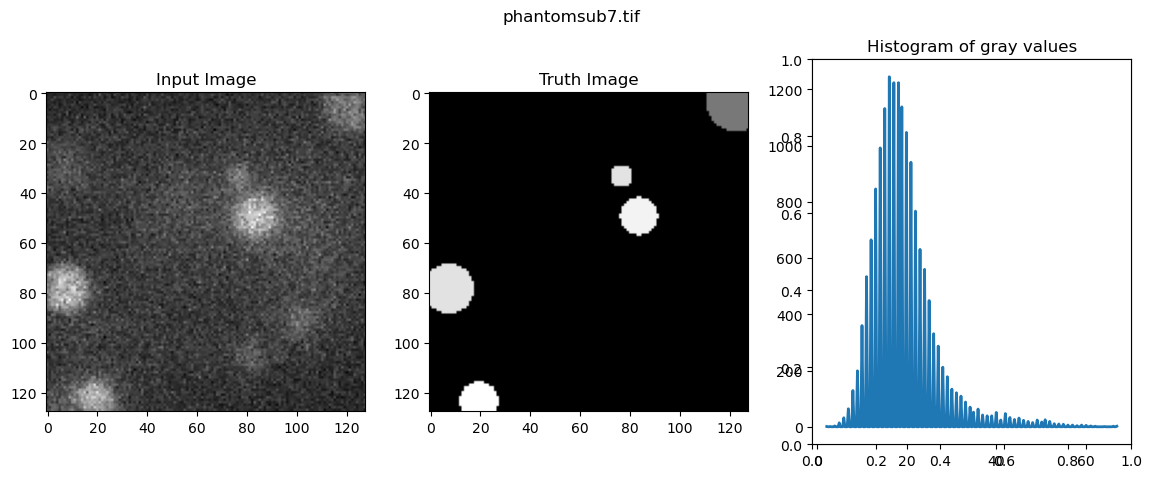

phantomsub8.tif


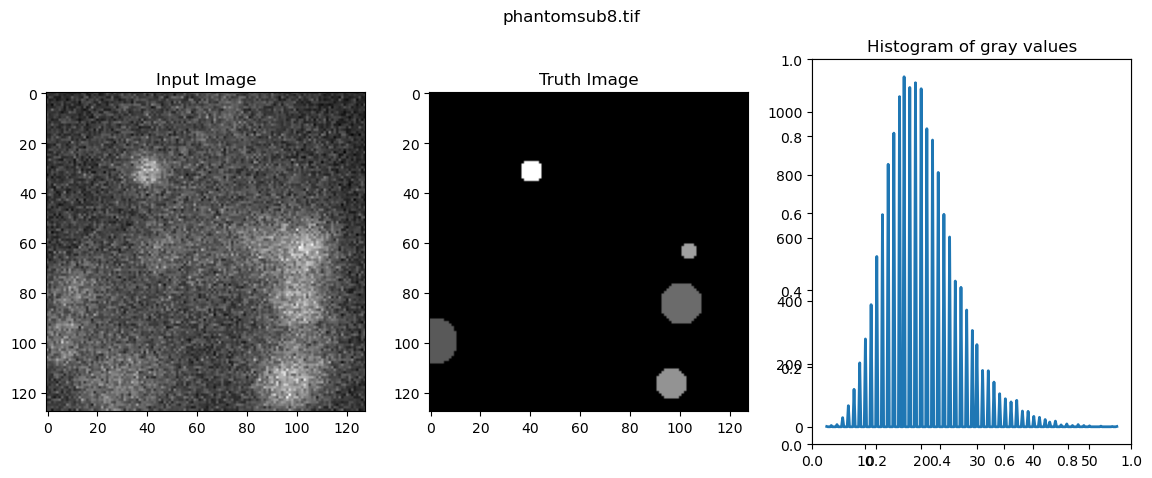

In [36]:
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt

# List all files in input_dir
input_files = os.listdir(input_dir)

for file in input_files:
    print(file)
    # Construct the full path to the file in input_dir and truth_dir
    input_file_path = os.path.join(input_dir, file)
    truth_file_path = os.path.join(truth_dir, file)

    # Check if the file exists in both directories
    if os.path.isfile(input_file_path) and os.path.isfile(truth_file_path):
        # Read the images
        input_image = io.imread(input_file_path)
        truth_image = io.imread(truth_file_path)

        hist, bins = np.histogram(input_image, bins=256)
       
        # Display the images
        fig, axs = plt.subplots(1, 3, figsize=(14, 5))
        axs[0].imshow(input_image, cmap='gray')
        axs[0].set_title('Input Image')
        axs[1].imshow(truth_image, cmap='gray')
        axs[1].set_title('Truth Image')

        # show hist with bin centers
        axs[2] = fig.add_subplot(133)
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        axs[2].plot(bin_centers, hist, lw=2)
        axs[2].set_title('Histogram of gray values')

        fig.suptitle(file)
 
        plt.show()